# BDA MINI PROJECT:
# Dataset:IMDb Top Rated Movies Dataset
# source:https://www.kaggle.com/datasets/vedikagupta0/imdb-top-950-movies-dataset-2025
####  This notebook analyzes a dataset of IMDb Top Rated Movies.
#### The dataset contains 950 movies with the following key information:
#### Rank: The position of the movie in IMDb's ranking.
#### Title: Movie title.
#### IMDb Rating: IMDb user rating (out of 10).
#### Votes: Number of user votes.
#### Meta Score: Critical metascore rating (if available).
#### Tags: Genres or descriptive tags of the movie.
#### Director: Director(s) of the movie.
#### Writers: Writers involved.
#### Stars: Main actors/actresses.
#### Description: Plot description.
#### Summary: Critical/Review-based summary.
#### Worldwide Gross: Box office earnings (if available).
#### Poster URL & Video URL: Links to poster and trailers.
#### We will perform various data cleaning, transformation, and analytical tasks on this dataset using PySpark.

In [8]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("IMDB_Movies").getOrCreate()

# Load your dataset
df = spark.read.csv("imdb-top-rated-movies-user-rated.csv", header=True, inferSchema=True)
spark

### **Explanation:** Initializes findspark so that Spark can be located and used inside this Python environment.

In [2]:
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- IMDb Rating: double (nullable = true)
 |-- Votes: string (nullable = true)
 |-- Poster URL: string (nullable = true)
 |-- Video URL: string (nullable = true)
 |-- Meta Score: double (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Writers: string (nullable = true)
 |-- Stars: string (nullable = true)
 |-- Summary: string (nullable = true)
 |-- Worldwide Gross: string (nullable = true)



### **Explanation:** Prints the schema of the DataFrame to show all column names and their data types.

In [3]:
df.show(5)

+----+--------------------+-----------+-----+--------------------+--------------------+----------+----------------+---------------+-----------+------------------+-----------------+--------------------+--------------------+
|Rank|               Title|IMDb Rating|Votes|          Poster URL|           Video URL|Meta Score|            Tags|       Director|Description|           Writers|            Stars|             Summary|     Worldwide Gross|
+----+--------------------+-----------+-----+--------------------+--------------------+----------+----------------+---------------+-----------+------------------+-----------------+--------------------+--------------------+
|   1|Once Upon a Time....|        7.6| 927K|https://www.imdb....|https://imdb-vide...|      84.0| """Period Drama|  Showbiz Drama|     Comedy|          Drama"""|Quentin Tarantino|"""As Hollywood's...|   Quentin Tarantino|
|   2|Mission: Impossib...|        7.6| 311K|https://www.imdb....|https://imdb-vide...|      81.0|  """Actio

### Displays a small sample of rows from the DataFrame in a tabular format for quick inspection.

In [4]:
from pyspark.sql.functions import col, regexp_replace

### Imports necessary libraries or modules which provide Spark, Pandas, or visualization functionality.

In [5]:
df2 = df.withColumn('Votes_num', regexp_replace('Votes','K','000'))

### That line creates a new column **`Votes_num`** by replacing the letter `"K"` in the `Votes` column with `"000"`.It’s a quick way to convert shorthand like `"5K"` into `"5000"` as a string.


In [6]:
df2 = df2.withColumn('Votes_num', regexp_replace('Votes_num','M','000000'))

### This updates **`Votes_num`** again, replacing `"M"` with `"000000"`.It converts shorthand like `"2M"` into `"2000000"` as a string.


In [7]:
df2 = df2.withColumn("IMDb_Rating_Num", col("IMDb Rating").cast("double"))
df2 = df2.withColumn("Meta_Score_Num", col("Meta Score").cast("double"))
df2 = df2.withColumn("Votes_Num_Clean", col("Votes_num").cast("double"))


### These lines create numeric versions of the string columns.They cast **`IMDb Rating`**, **`Meta Score`**, and **`Votes_num`** into `double` type columns:IMDb_Rating_Num`, `Meta_Score_Num`, and `Votes_Num_Clean` for proper numerical analysis.


In [8]:
df2 = df2.withColumn('Votes_num', col('Votes_num').cast('int'))

### This line converts the **`Votes_num`** column from string to integer type,so values like `"5000"` become `5000` as an actual number for calculations.


In [9]:
df2 = df2.withColumn('IMDb Rating', col('IMDb Rating').cast('double')).withColumn('Meta Score', col('Meta Score').cast('double'))

### This line directly casts the existing columns **`IMDb Rating`** and **`Meta Score`** to `double` type,replacing the old string versions with numeric ones in the same columns.


In [10]:
df2.count()

950

### Performs specific transformations or actions on the DataFrame to progress the analysis.

In [11]:
df2.select('IMDb Rating').summary().show()

+-------+-------------------+
|summary|        IMDb Rating|
+-------+-------------------+
|  count|                950|
|   mean|   7.94463157894744|
| stddev|0.21729154964599615|
|    min|                7.6|
|    25%|                7.8|
|    50%|                7.9|
|    75%|                8.1|
|    max|                8.5|
+-------+-------------------+



### It shows summary statistics (count, mean, stddev, min, max, quartiles) for the `IMDb Rating` column.


In [12]:
df2.select('Meta Score').summary().show()

+-------+------------------+
|summary|        Meta Score|
+-------+------------------+
|  count|               793|
|   mean| 79.14249684741488|
| stddev|11.864496836023983|
|    min|              30.0|
|    25%|              72.0|
|    50%|              80.0|
|    75%|              88.0|
|    max|             100.0|
+-------+------------------+



### It shows summary statistics (count, mean, stddev, min, max, quartiles) for the `Meta Score` column.


In [13]:
df2.select('Director').distinct().count()

564

###  It returns the number of distinct (unique) directors in the **`Director`** column.


In [14]:
df2.orderBy(col('IMDb Rating').desc()).select('Title','IMDb Rating').show(20)

+--------------------+-----------+
|               Title|IMDb Rating|
+--------------------+-----------+
|            Parasite|        8.5|
|        The Departed|        8.5|
|        The Prestige|        8.5|
|               Alien|        8.5|
|  The Usual Suspects|        8.5|
|      Dune: Part Two|        8.5|
|  Back to the Future|        8.5|
|    Django Unchained|        8.5|
|            Whiplash|        8.5|
|           Gladiator|        8.5|
|Spider-Man: Acros...|        8.5|
|Léon: The Profess...|        8.5|
|Grave of the Fire...|        8.5|
|  American History X|        8.5|
|         The Pianist|        8.5|
|    The Intouchables|        8.5|
|       The Lion King|        8.5|
|Inglourious Basterds|        8.4|
|    Sunset Boulevard|        8.4|
|   Avengers: Endgame|        8.4|
+--------------------+-----------+
only showing top 20 rows


### It displays the top 20 movies sorted by **IMDb Rating** in descending order, showing only their **Title** and **IMDb Rating**.


In [15]:
df2.orderBy(col('IMDb Rating')).select('Title','IMDb Rating').show(20)

+--------------------+-----------+
|               Title|IMDb Rating|
+--------------------+-----------+
|Once Upon a Time....|        7.6|
|Mission: Impossib...|        7.6|
|John Wick: Chapter 4|        7.6|
|            Watchmen|        7.6|
|   The Fifth Element|        7.6|
|Blue Is the Warme...|        7.6|
|          The Others|        7.6|
|  Hell or High Water|        7.6|
|     Minority Report|        7.6|
|           The Whale|        7.6|
|   Anatomy of a Fall|        7.6|
|  500 Days of Summer|        7.6|
|The Last of the M...|        7.6|
|                 300|        7.6|
|The Butterfly Effect|        7.6|
|           Moneyball|        7.6|
|        Office Space|        7.6|
|                 Saw|        7.6|
|         After Hours|        7.6|
|Star Wars: Episod...|        7.6|
+--------------------+-----------+
only showing top 20 rows


### It displays the bottom 20 movies sorted by **IMDb Rating** in ascending order, showing only their **Title** and **IMDb Rating**.


In [16]:
df2.orderBy(col('Meta Score').desc()).select('Title','Meta Score').show(10)

+--------------------+----------+
|               Title|Meta Score|
+--------------------+----------+
|             Boyhood|     100.0|
|           Notorious|     100.0|
|         The Leopard|     100.0|
|      The Conformist|     100.0|
|Sweet Smell of Su...|     100.0|
|        Citizen Kane|     100.0|
|         Tokyo Story|     100.0|
|   Three Colors: Red|     100.0|
| Fanny and Alexander|     100.0|
|             Vertigo|     100.0|
+--------------------+----------+
only showing top 10 rows


### It displays the top 10 movies sorted by **Meta Score** in descending order, showing only their **Title** and **Meta Score**.


In [18]:
df2.groupBy('Director').count().orderBy(col('count').desc()).show(20)

+-----------------+-----+
|         Director|count|
+-----------------+-----+
|   Akira Kurosawa|   11|
| Alfred Hitchcock|   10|
|   Hayao Miyazaki|    9|
|  Stanley Kubrick|    9|
|   Ingmar Bergman|    9|
| Steven Spielberg|    8|
|   Clint Eastwood|    8|
|     Billy Wilder|    8|
|  Martin Scorsese|    8|
| Andrei Tarkovsky|    7|
|     Howard Hawks|    7|
|       Rob Reiner|    7|
| Denis Villeneuve|    7|
|        John Ford|    6|
|      John Huston|    6|
|     Ridley Scott|    6|
|      Woody Allen|    6|
|       Ron Howard|    6|
|    David Fincher|    6|
|Christopher Nolan|    6|
+-----------------+-----+
only showing top 20 rows


### It shows the top 20 directors with the highest number of movies, ordered by their movie counts in descending order.


In [19]:
df2.groupBy('Director').avg('IMDb Rating').orderBy(col('avg(IMDb Rating)').desc()).show(20)

+--------------------+-----------------+
|            Director| avg(IMDb Rating)|
+--------------------+-----------------+
|     Olivier Nakache|              8.5|
|  Joaquim Dos Santos|              8.5|
|        Roger Allers|              8.5|
|          Luc Besson|              8.5|
|      Makoto Shinkai|              8.4|
| Nithilan Saminathan|              8.4|
|       Jeethu Joseph|              8.4|
|   Wolfgang Petersen|              8.4|
|Marco Tullio Gior...|              8.4|
|         Vetrimaaran|              8.4|
|        Milos Forman|              8.4|
|     Bob Persichetti|              8.4|
|       Nadine Labaki|              8.4|
|         Lee Unkrich|8.350000000000001|
|    Lokesh Kanagaraj|8.350000000000001|
|  Jean-Pierre Jeunet|              8.3|
|    Richard Marquand|              8.3|
|         Thomas Kail|              8.3|
|    Alphonse Puthren|              8.3|
|           Ram Kumar|              8.3|
+--------------------+-----------------+
only showing top

### It shows the top 20 directors with the highest **average IMDb Rating**, ordered in descending order of that average.


In [20]:
df2.groupBy('Director').avg('Meta Score').orderBy(col('avg(Meta Score)').desc()).show(10)

+--------------------+---------------+
|            Director|avg(Meta Score)|
+--------------------+---------------+
|Alexander Mackend...|          100.0|
|    Luchino Visconti|          100.0|
|        Yasujirô Ozu|          100.0|
|        Orson Welles|           99.5|
|         Jean Renoir|           99.0|
|        Jacques Tati|           99.0|
|Joseph L. Mankiewicz|           98.0|
| Carl Theodor Dreyer|           98.0|
|       Sam Peckinpah|           98.0|
|  Guillermo del Toro|           98.0|
+--------------------+---------------+
only showing top 10 rows


### It shows the top 10 directors with the highest **average Meta Score**, ordered in descending order of that average.
.

In [21]:
df2.filter(col('Director')=='Christopher Nolan').select('Title','IMDb Rating','Meta Score').show()

+--------------------+-----------+----------+
|               Title|IMDb Rating|Meta Score|
+--------------------+-----------+----------+
|             Dunkirk|        7.8|      94.0|
|       Batman Begins|        8.2|      70.0|
|         Oppenheimer|        8.3|      90.0|
|             Memento|        8.4|      83.0|
|The Dark Knight R...|        8.4|      78.0|
|        The Prestige|        8.5|      66.0|
+--------------------+-----------+----------+



### It displays all movies directed by **Christopher Nolan**, showing their **Title**, **IMDb Rating**, and **Meta Score**.


In [22]:
df2.filter(col('Director')=='Steven Spielberg').select('Title','IMDb Rating','Meta Score').show()

+--------------------+-----------+----------+
|               Title|IMDb Rating|Meta Score|
+--------------------+-----------+----------+
|   Empire of the Sun|        7.7|      62.0|
|    The Color Purple|        7.7|      78.0|
|E.T. the Extra-Te...|        7.9|      92.0|
|                Jaws|        8.1|      87.0|
| Catch Me If You Can|        8.1|      75.0|
|       Jurassic Park|        8.2|      68.0|
|Indiana Jones and...|        8.2|      65.0|
|Raiders of the Lo...|        8.4|      86.0|
+--------------------+-----------+----------+



### It displays all movies directed by **Steven Spielberg**, showing their **Title**, **IMDb Rating**, and **Meta Score**.


In [23]:
from pyspark.sql.functions import split, explode

### Imports necessary libraries or modules which provide Spark, Pandas, or visualization functionality.

In [24]:
df_tags = df2.withColumn('Tag', explode(split(col('Tags'), ',')))

####  This line splits the **`Tags`** column by commas and **explodes** it,
creating a new column **`Tag`** where each row contains a single tag from the list.


In [25]:
df_tags.groupBy('Tag').count().orderBy(col('count').desc()).show(10)

+-------------+-----+
|          Tag|count|
+-------------+-----+
|        Drama|  685|
|     Thriller|  230|
|       Comedy|  194|
|        Crime|  180|
|    Adventure|  164|
|       Action|  155|
|      Romance|  152|
|      Tragedy|  140|
| Period Drama|  125|
|           Fi|  123|
+-------------+-----+
only showing top 10 rows


#### It shows the top 10 most frequent **tags**, ordered by their count in descending order.


In [26]:
df_tags.groupBy('Tag').avg('IMDb Rating').orderBy(col('avg(IMDb Rating)').desc()).show(10)

+--------------------+-----------------+
|                 Tag| avg(IMDb Rating)|
+--------------------+-----------------+
|   Police Procedural|              8.4|
|               Shōjo|              8.4|
|            Disaster|              8.2|
|  Dinosaur Adventure|              8.2|
|       Sketch Comedy|              8.2|
|       Quirky Comedy|8.166666666666666|
| Artificial Intel...|             8.15|
|    Desert Adventure|8.149999999999999|
|    Suspense Mystery|             8.14|
|     Adult Animation|8.133333333333335|
+--------------------+-----------------+
only showing top 10 rows


#### It shows the top 10 tags with the highest **average IMDb Rating**, ordered in descending order of that average.


In [27]:
df_tags.groupBy('Tag').avg('Meta Score').orderBy(col('avg(Meta Score)').desc()).show(10)

+----------------+---------------+
|             Tag|avg(Meta Score)|
+----------------+---------------+
|   Showbiz Drama|           98.0|
|    Western Epic|           98.0|
|    Swashbuckler|           97.0|
| Holiday Romance|           96.0|
|         Concert|           96.0|
|           Heist|           94.5|
|     Pop Musical|           94.0|
|         Western|           93.0|
| Classic Musical|           92.0|
|               B|           92.0|
+----------------+---------------+
only showing top 10 rows


#### It shows the top 10 tags with the highest **average Meta Score**, ordered in descending order of that average.


In [28]:
df_stars = df2.withColumn('Star', explode(split(col('Stars'), ',')))

####  This line splits the **`Stars`** column by commas and **explodes** it,
creating a new column **`Star`** where each row contains a single actor/actress from the list.
.

In [29]:
df_stars.groupBy('Star').count().orderBy(col('count').desc()).show(20)

+-------------------+-----+
|               Star|count|
+-------------------+-----+
|     Robert De Niro|    9|
|          Tom Hanks|    8|
|         Aamir Khan|    8|
| Scarlett Johansson|    8|
|        Emma Watson|    7|
|  Leonardo DiCaprio|    7|
|          Al Pacino|    7|
|    Humphrey Bogart|    7|
|     Clint Eastwood|    7|
|     Toshirô Mifune|    6|
|      James Stewart|    6|
|         Cary Grant|    6|
|               Jean|    6|
|         Tom Cruise|    6|
|    Jake Gyllenhaal|    5|
|  Denzel Washington|    5|
|       Akshay Kumar|    5|
|   Daniel Radcliffe|    5|
|      Harrison Ford|    5|
|         Matt Damon|    5|
+-------------------+-----+
only showing top 20 rows


#### It shows the top 20 most frequently appearing **stars (actors/actresses)**, ordered by their movie counts in descending order.


In [30]:
df2.stat.corr('IMDb Rating','Meta Score')

-0.12782300477033598

### It calculates the **correlation coefficient** between **IMDb Rating** and **Meta Score**, showing how strongly and in what direction they are related.


In [31]:
from pyspark.sql.functions import abs
df_diff = df2.withColumn("ScoreGap", abs(col("IMDb Rating")*10 - col("Meta Score")))
df_diff.orderBy(col("ScoreGap").desc()).select("Title","IMDb Rating","Meta Score","ScoreGap").show(10)

+--------------------+-----------+----------+--------+
|               Title|IMDb Rating|Meta Score|ScoreGap|
+--------------------+-----------+----------+--------+
|         Elite Squad|        8.0|      33.0|    47.0|
|The Butterfly Effect|        7.6|      30.0|    46.0|
|Evangelion: 2.0 Y...|        7.9|      46.0|    33.0|
|Pink Floyd: The Wall|        8.0|      47.0|    33.0|
| Blood In- Blood Out|        7.9|      47.0|    32.0|
| The Boondock Saints|        7.6|      44.0|    32.0|
|             Flipped|        7.7|      45.0|    32.0|
|            Predator|        7.8|      47.0|    31.0|
|   Bohemian Rhapsody|        7.9|      49.0|    30.0|
|         Primal Fear|        7.7|      47.0|    30.0|
+--------------------+-----------+----------+--------+
only showing top 10 rows


####  This creates a new column **`ScoreGap`** as the absolute difference between **IMDb Rating (scaled to 10×)** and **Meta Score**, then shows the top 10 movies with the **largest gap** between the two scores along with their **Title, IMDb Rating, Meta Score, and ScoreGap**.


In [32]:
df2.select("IMDb Rating").distinct().show(20)


+-----------+
|IMDb Rating|
+-----------+
|        8.0|
|        7.7|
|        8.4|
|        7.9|
|        8.5|
|        7.6|
|        8.2|
|        7.8|
|        8.3|
|        8.1|
+-----------+



#### It displays the first 20 **distinct IMDb Rating values** from the dataset.


In [33]:
df2.groupBy("Director").count().filter(col("count")>=3).join(
    df2.groupBy("Director").min("IMDb Rating"),"Director"
).orderBy(col("min(IMDb Rating)").desc()).show(10)

+--------------------+-----+----------------+
|            Director|count|min(IMDb Rating)|
+--------------------+-----+----------------+
|     Charles Chaplin|    4|             8.1|
|     Rajkumar Hirani|    4|             8.0|
|      Roman Polanski|    3|             8.0|
|      Emir Kusturica|    3|             8.0|
|       William Wyler|    3|             8.0|
|           Brad Bird|    3|             8.0|
|         Pete Docter|    4|             8.0|
|       Neeraj Pandey|    4|             7.9|
|Franklin J. Schaf...|    3|             7.9|
|         Wim Wenders|    3|             7.9|
+--------------------+-----+----------------+
only showing top 10 rows


#### It shows directors with at least **3 movies** and lists the top 10 whose **worst movie still has a very high IMDb rating**.


In [34]:
from pyspark.sql.functions import max, min, col

# Step 1: Group by Director and compute both max and min ratings with aliases
df_gap = df2.groupBy("Director").agg(
    max("IMDb Rating").alias("Max_Rating"),
    min("IMDb Rating").alias("Min_Rating")
)

# Step 2: Compute the gap and sort
df_gap.withColumn("Gap", col("Max_Rating") - col("Min_Rating")) \
      .orderBy(col("Gap").desc()) \
      .show(10)


+----------------+----------+----------+------------------+
|        Director|Max_Rating|Min_Rating|               Gap|
+----------------+----------+----------+------------------+
|       Tony Kaye|       8.5|       7.7|0.7999999999999998|
|    Bong Joon Ho|       8.5|       7.7|0.7999999999999998|
|    Ridley Scott|       8.5|       7.7|0.7999999999999998|
| Robert Zemeckis|       8.5|       7.7|0.7999999999999998|
|Denis Villeneuve|       8.5|       7.7|0.7999999999999998|
|  Hayao Miyazaki|       8.3|       7.6|0.7000000000000011|
|      Sam Mendes|       8.3|       7.6|0.7000000000000011|
|Alfred Hitchcock|       8.3|       7.6|0.7000000000000011|
| Martin Scorsese|       8.5|       7.8|0.7000000000000002|
|   Anthony Russo|       8.4|       7.7|0.7000000000000002|
+----------------+----------+----------+------------------+
only showing top 10 rows


#### This code calculates, for each director, the **highest and lowest IMDb Rating**, then computes the **gap** between them, and finally shows the top 10 directors with the **biggest rating difference** across their movies.


In [35]:
df2.groupBy("Director").min("IMDb Rating").filter(col("min(IMDb Rating)")>=8).show(10)

+------------------+----------------+
|          Director|min(IMDb Rating)|
+------------------+----------------+
|     Yôjirô Takita|             8.0|
|      Claude Berri|             8.1|
|    Florian Zeller|             8.2|
|Billy Bob Thornton|             8.0|
|    Park Kyung-Jin|             8.1|
|        Tim Miller|             8.0|
|        Peter Weir|             8.1|
|        Kabir Khan|             8.1|
|      Majid Majidi|             8.2|
|   Sriram Raghavan|             8.2|
+------------------+----------------+
only showing top 10 rows


#### It shows directors whose **lowest-rated movie** has an **IMDb Rating of at least 8**, displaying the first 10 such directors.


In [36]:
df2.groupBy("Tags").count().orderBy(col("count").desc()).show(10)

+--------------------+-----+
|                Tags|count|
+--------------------+-----+
|Psychological Dra...|   15|
|               Drama|    9|
|Psychological Dra...|    8|
|      Drama, Romance|    7|
|       Comedy, Drama|    6|
|Satire, Comedy, D...|    5|
|Comedy, Drama, Ro...|    5|
| Period Drama, Drama|    5|
|      """Action Epic|    5|
|      Tragedy, Drama|    5|
+--------------------+-----+
only showing top 10 rows


#### It shows the top 10 most frequent **Tags** (as whole strings, not split), ordered by their count in descending order.


In [37]:
df2.filter(col("Tags").like("%Action%") & col("Tags").like("%Drama%")).select("Title","Tags").show(10)

+--------------------+--------------------+
|               Title|                Tags|
+--------------------+--------------------+
|             Sicario|Contemporary West...|
|     Black Hawk Down|Action Epic, Docu...|
|         Man on Fire|Tragedy, Action, ...|
|The Count of Mont...|Period Drama, Swa...|
|  Godzilla Minus One|Action Epic, Adve...|
|   The Promised Land|Epic, Historical ...|
|         First Blood|One,Person Army A...|
|The French Connec...|Cop Drama, Drug C...|
|The Magnificent S...|Classical Western...|
|         Dirty Harry|Cop Drama, Police...|
+--------------------+--------------------+
only showing top 10 rows


####  It displays the first 10 movies whose **Tags** contain both **“Action”** and **“Drama”**, showing their **Title** and **Tags**.


In [38]:
df_stars.filter(col("IMDb Rating")>=8.5).groupBy("Star").count().orderBy(col("count").desc()).show(20)


+--------------------+-----+
|                Star|count|
+--------------------+-----+
|     Joaquin Phoenix|    1|
|   Timothée Chalamet|    1|
|     Ronald Shusett"|    1|
|    Chazz Palminteri|    1|
|        Jeremy Irons|    1|
|      Connie Nielsen|    1|
|   Leonardo DiCaprio|    1|
|         Gary Oldman|    1|
| ""Beverly DAngel...|    1|
|           Song Kang|    1|
|                  ho|    1|
|      Michael J. Fox|    1|
|        J.K. Simmons|    1|
|          Jamie Foxx|    1|
|             Zendaya|    1|
|   Matthew Broderick|    1|
|    Rebecca Ferguson|    1|
|             Cho Yeo|    1|
|    Hailee Steinfeld|    1|
|          Anne Le Ny|    1|
+--------------------+-----+
only showing top 20 rows


#### It shows the top 20 **stars** who appeared in movies with an **IMDb Rating ≥ 8.5**, ordered by how many such movies they acted in.


In [45]:
df2.filter(col("Tags").like("%Action%") & col("Tags").like("%Drama%")).select("Title","Tags").show(10)

+--------------------+--------------------+
|               Title|                Tags|
+--------------------+--------------------+
|             Sicario|Contemporary West...|
|     Black Hawk Down|Action Epic, Docu...|
|         Man on Fire|Tragedy, Action, ...|
|The Count of Mont...|Period Drama, Swa...|
|  Godzilla Minus One|Action Epic, Adve...|
|   The Promised Land|Epic, Historical ...|
|         First Blood|One,Person Army A...|
|The French Connec...|Cop Drama, Drug C...|
|The Magnificent S...|Classical Western...|
|         Dirty Harry|Cop Drama, Police...|
+--------------------+--------------------+
only showing top 10 rows


#### It displays the first 10 movies whose **Tags** include both **“Action”** and **“Drama”**, showing their **Title** and **Tags**.


In [46]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


####  Performs specific transformations or actions on the DataFrame to progress the analysis.

In [47]:
!pip install seaborn

####  Performs specific transformations or actions on the DataFrame to progress the analysis.

In [59]:
# Spark functions
from pyspark.sql.functions import col

# Convert Spark DataFrame → Pandas DataFrame
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline in Jupyter Notebook
%matplotlib inline

# Set global plot style
plt.style.use("seaborn-v0_8")
sns.set_theme()

# Quick check: Spark DataFrame to Pandas (small sample)
df2_pd = df2.limit(5).toPandas()
df2_pd.head()


,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross,Votes_num,IMDb_Rating_Num,Meta_Score_Num,Votes_Num_Clean
0,1,Once Upon a Time... in Hollywood,7.6,927K,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"""""""Period Drama",Showbiz Drama,Comedy,"Drama""""""",Quentin Tarantino,"""""""As Hollywood's Golden Age is winding down d...",Quentin Tarantino,927000,7.6,84.0,927000.0
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311K,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"""""""Action Epic",Adventure Epic,Spy,Action,Adventure,"Thriller""""""",Christopher McQuarrie,311000,7.6,81.0,311000.0
2,3,John Wick: Chapter 4,7.6,392K,https://www.imdb.com/title/tt10366206/mediavie...,https://imdb-video.media-imdb.com/vi289916185/...,78.0,"""""""Action Epic",Gun Fu,One,Person Army Action,Action,Crime,"Thriller""""""",392000,7.6,78.0,392000.0
3,4,Watchmen,7.6,603K,https://www.imdb.com/title/tt0409459/mediaview...,https://imdb-video.media-imdb.com/vi240565017/...,56.0,"""""""Dystopian Sci",Fi,Superhero,Action,Drama,Mystery,Sci,603000,7.6,56.0,603000.0
4,5,The Fifth Element,7.6,533K,https://www.imdb.com/title/tt0119116/mediaview...,https://imdb-video.media-imdb.com/vi854720793/...,52.0,"""""""Sci",Fi Epic,Space Sci,Fi,Action,Adventure,Sci,533000,7.6,52.0,533000.0


####  This code sets up **Pandas, Matplotlib, and Seaborn** for plotting,
then converts a small sample of the Spark DataFrame (`df2`) into a **Pandas DataFrame** (5 rows) and shows the first few rows.


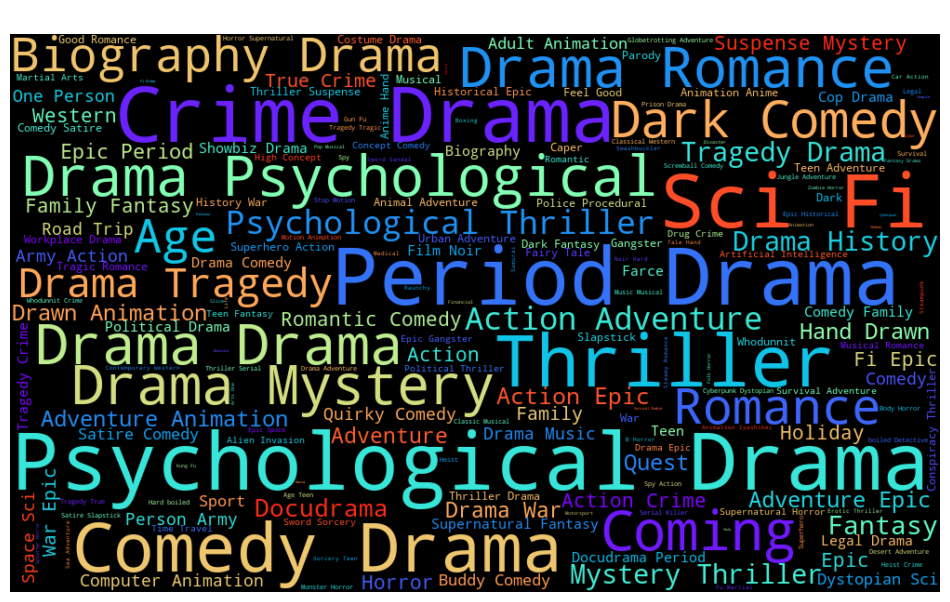

In [102]:

!pip install wordcloud
from wordcloud import WordCloud

tags_list = df_tags.select("Tag").toPandas()["Tag"].tolist()
wordcloud = WordCloud(width=1000, height=600, background_color="black", colormap="rainbow").generate(" ".join(tags_list))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tags", fontsize=16, fontweight="bold", color="white")
plt.show()


####  This code installs and imports **WordCloud**, collects all movie **tags** into a list, then generates and displays a colorful **word cloud** (with larger words for more frequent tags) on a black background.


C:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127878 (\N{FIREWORKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


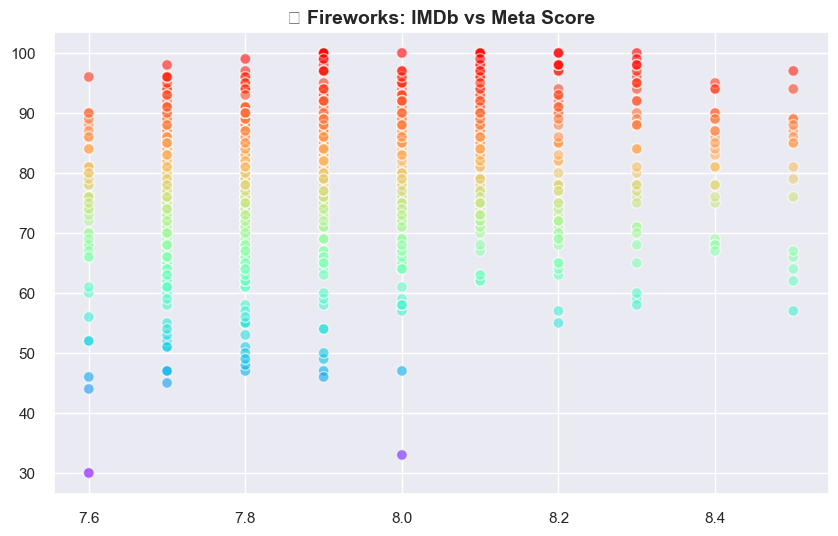

In [109]:
fireworks_pd = df2.select("IMDb Rating","Meta Score").dropna().toPandas()

plt.figure(figsize=(10,6))
plt.scatter(fireworks_pd["IMDb Rating"], fireworks_pd["Meta Score"], 
            c=fireworks_pd["Meta Score"], cmap="rainbow", s=60, alpha=0.6, edgecolors="white")
plt.title("🎆 Fireworks: IMDb vs Meta Score", fontsize=14, fontweight="bold")
plt.show()


####  It creates a colorful scatter plot showing the relationship between **IMDb Rating** and **Meta Score** for movies.


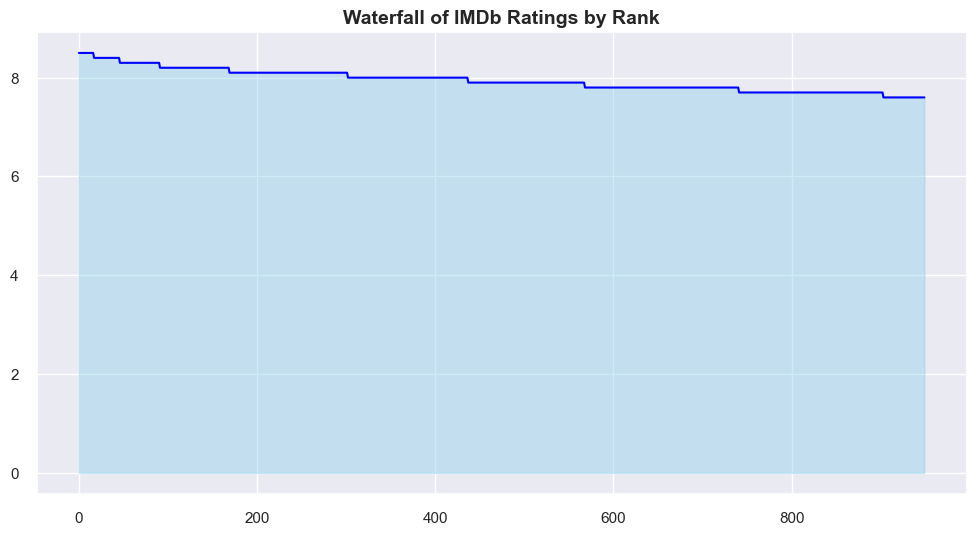

In [110]:
ratings_rank_pd = df2.select("IMDb Rating").toPandas().sort_values("IMDb Rating", ascending=False).reset_index()

plt.figure(figsize=(12,6))
plt.plot(ratings_rank_pd.index, ratings_rank_pd["IMDb Rating"], color="blue")
plt.fill_between(ratings_rank_pd.index, ratings_rank_pd["IMDb Rating"], color="skyblue", alpha=0.4)
plt.title("Waterfall of IMDb Ratings by Rank", fontsize=14, fontweight="bold")
plt.show()


##### It plots a **ranked line chart** of IMDb Ratings in descending order, with a shaded area under the curve to create a “waterfall” effect.


C:\Users\abc\AppData\Local\Temp\ipykernel_31060\1103345318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_avg_pd, x="avg(IMDb Rating)", y="Tag", palette="coolwarm", hatch="///")


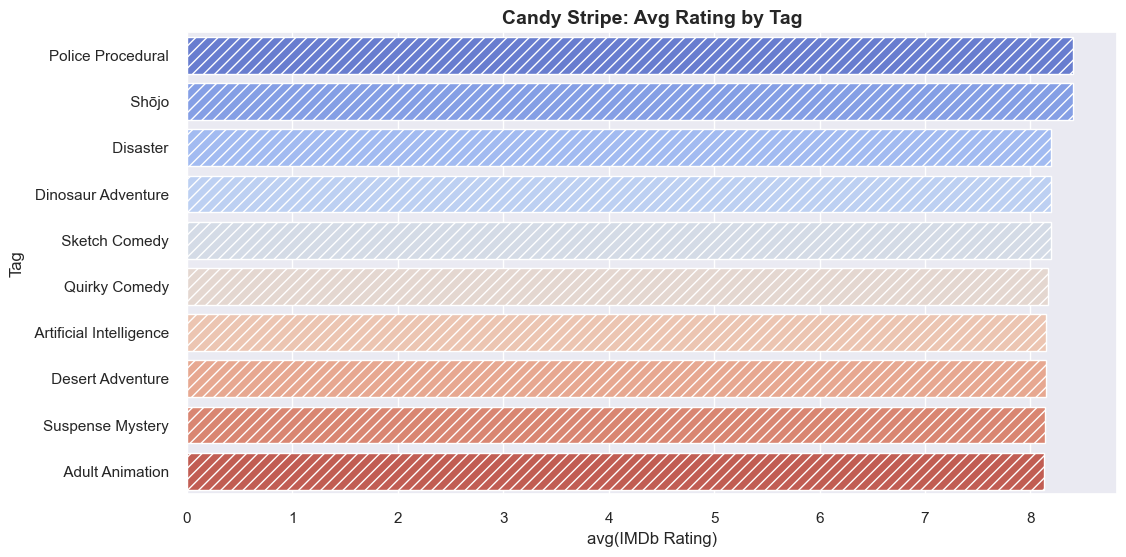

In [111]:
tag_avg_pd = df_tags.groupBy("Tag").avg("IMDb Rating").orderBy(col("avg(IMDb Rating)").desc()).limit(10).toPandas()

plt.figure(figsize=(12,6))
sns.barplot(data=tag_avg_pd, x="avg(IMDb Rating)", y="Tag", palette="coolwarm", hatch="///")
plt.title("Candy Stripe: Avg Rating by Tag", fontsize=14, fontweight="bold")
plt.show()


##### It creates a **bar chart** of the top 10 tags with the highest average IMDb Rating, styled with a striped (“candy stripe”) pattern.
.

C:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


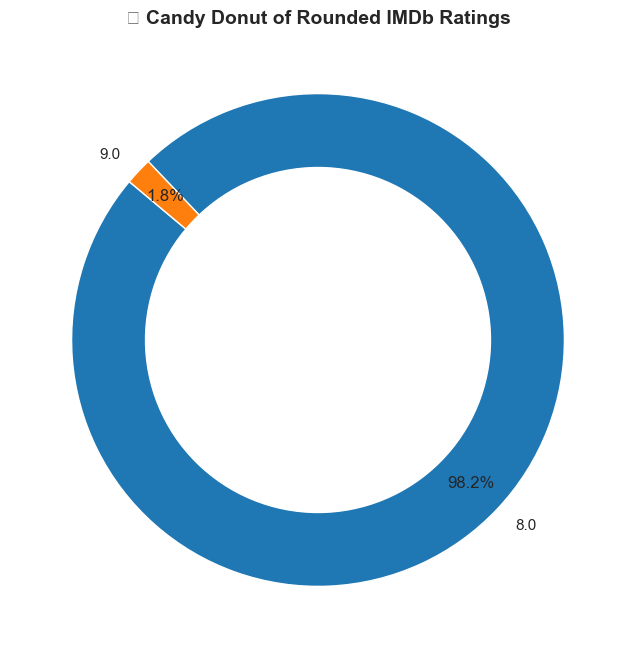

In [120]:
from pyspark.sql.functions import round as pyspark_round

rounded_pd = df2.withColumn("Rounded", pyspark_round("IMDb Rating")) \
                .groupBy("Rounded").count().toPandas()

plt.figure(figsize=(8,8))
plt.pie(rounded_pd["count"], labels=rounded_pd["Rounded"], autopct="%1.1f%%",
        pctdistance=0.85, startangle=140, colors=sns.color_palette("tab10"))
centre_circle = plt.Circle((0,0),0.70,fc="white")
plt.gca().add_artist(centre_circle)
plt.title("🍩 Candy Donut of Rounded IMDb Ratings", fontsize=14, fontweight="bold")
plt.show()


####  It creates a **donut chart** showing the distribution of movies by their **rounded IMDb Ratings**.


C:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


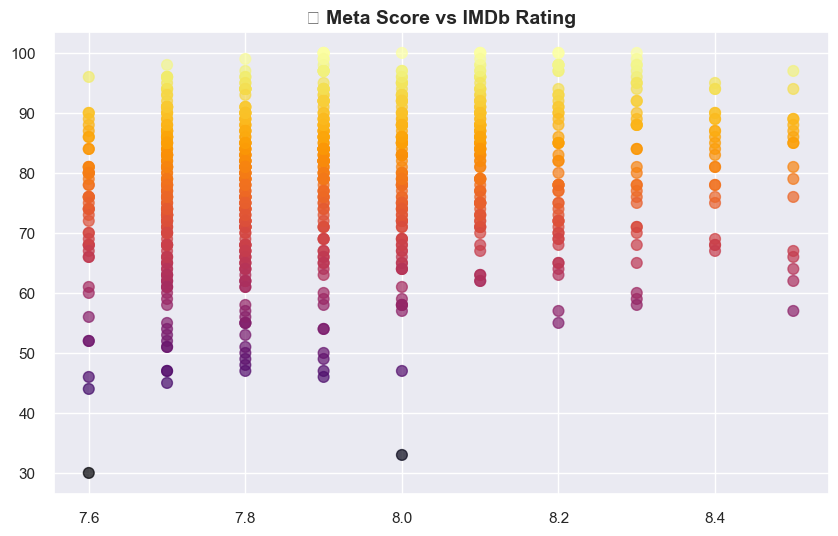

In [121]:
fire_pd = df2.select("IMDb Rating","Meta Score").dropna().toPandas()

plt.figure(figsize=(10,6))
plt.scatter(fire_pd["IMDb Rating"], fire_pd["Meta Score"],
            c=fire_pd["Meta Score"], cmap="inferno", alpha=0.7, s=60)
plt.title("🔥 Meta Score vs IMDb Rating", fontsize=14, fontweight="bold")
plt.show()


####  It creates a **scatter plot** of IMDb Rating vs Meta Score, using the **inferno colormap** for a fiery visual effect.


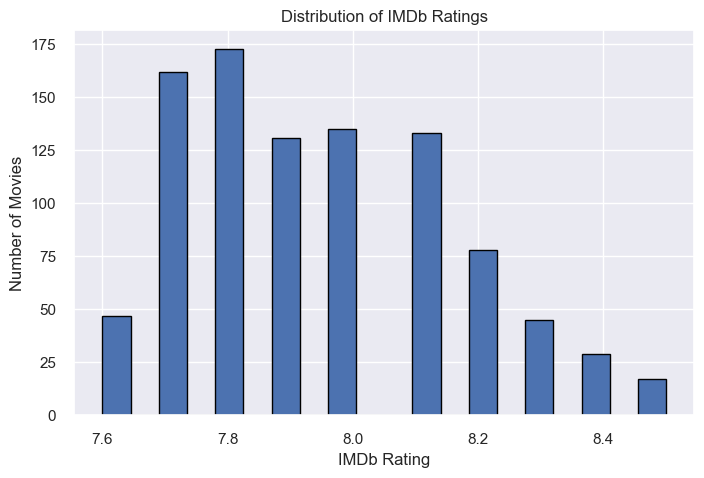

In [60]:
df2_pd = df2.select("IMDb Rating").toPandas()
plt.figure(figsize=(8,5))
plt.hist(df2_pd["IMDb Rating"], bins=20, edgecolor="black")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()


##### It creates a **histogram** showing the distribution of movies across different **IMDb Rating** ranges.



C:\Users\abc\AppData\Local\Temp\ipykernel_31060\2899710195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_pd, x="IMDb Rating", y="Title", palette="viridis")


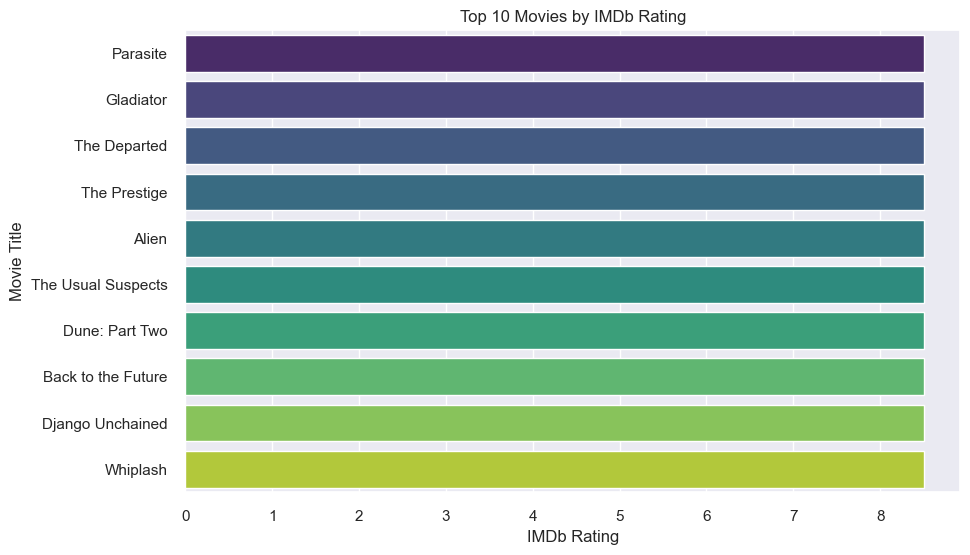

In [62]:
top10_pd = df2.orderBy(col("IMDb Rating").desc()).limit(10).select("Title","IMDb Rating").toPandas()
plt.figure(figsize=(10,6))
sns.barplot(data=top10_pd, x="IMDb Rating", y="Title", palette="viridis")
plt.title("Top 10 Movies by IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Title")
plt.show()



##### It creates a **horizontal bar chart** of the **top 10 movies by IMDb Rating**, showing movie titles on the y-axis and their ratings on the x-axis.


C:\Users\abc\AppData\Local\Temp\ipykernel_31060\1025770685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dir_pd, x="avg(IMDb Rating)", y="Director", palette="cubehelix")


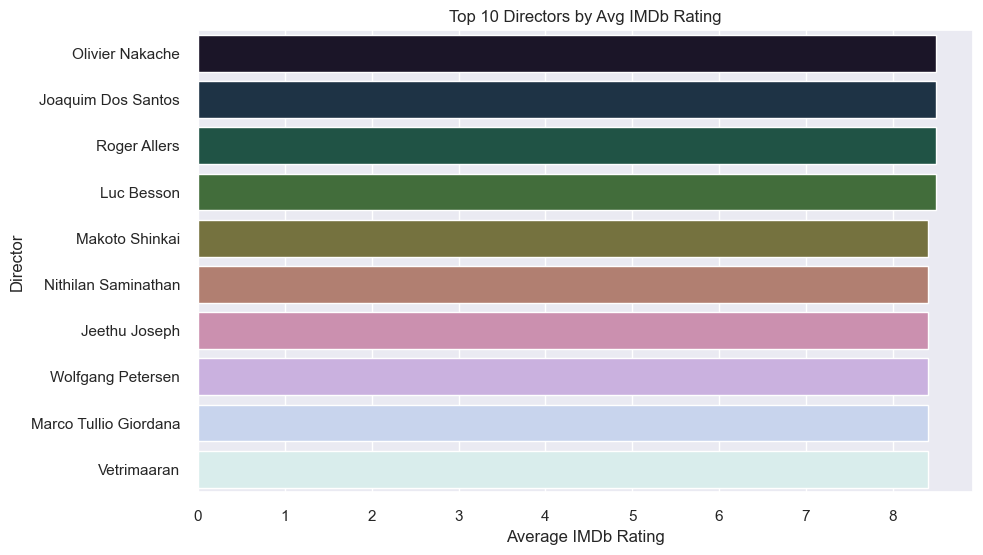

In [64]:
dir_pd = df2.groupBy("Director").avg("IMDb Rating").orderBy(col("avg(IMDb Rating)").desc()).limit(10).toPandas()
plt.figure(figsize=(10,6))
sns.barplot(data=dir_pd, x="avg(IMDb Rating)", y="Director", palette="cubehelix")
plt.title("Top 10 Directors by Avg IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Director")
plt.show()


##### It creates a **bar chart** of the **top 10 directors ranked by average IMDb Rating**, with directors on the y-axis and their average ratings on the x-axis.


C:\Users\abc\AppData\Local\Temp\ipykernel_31060\1102888521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_count_pd, y="Tag", x="count", palette="viridis")


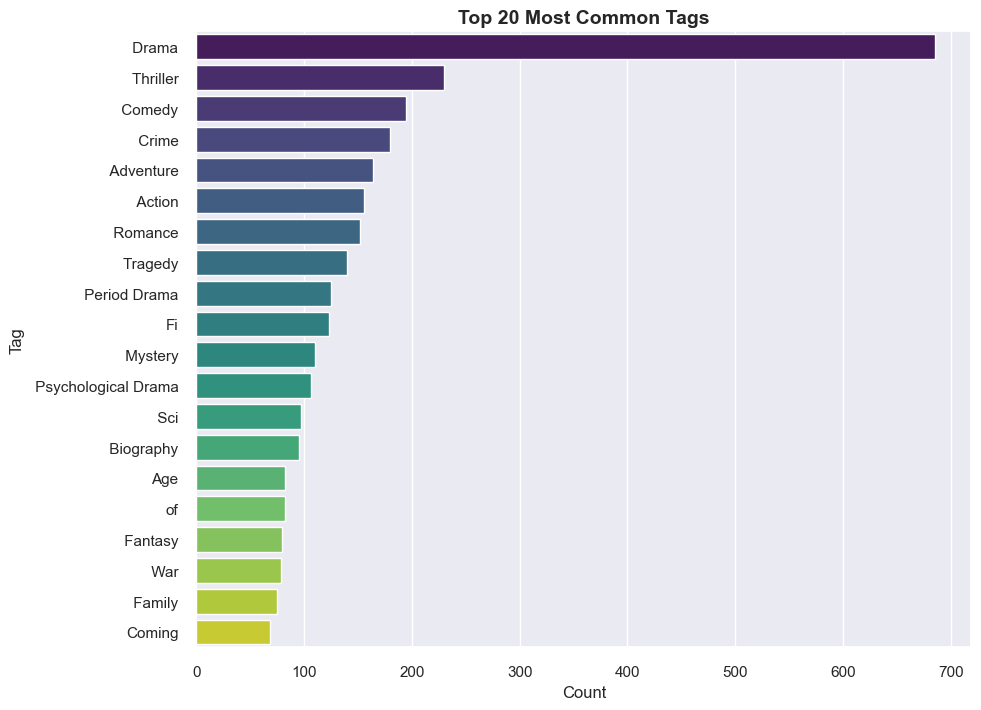

In [70]:
tags_count_pd = df_tags.groupBy("Tag").count().orderBy(col("count").desc()).limit(20).toPandas()
plt.figure(figsize=(10,8))
sns.barplot(data=tags_count_pd, y="Tag", x="count", palette="viridis")
plt.title("Top 20 Most Common Tags", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()


#####  It creates a **bar chart** of the **top 20 most frequent tags**, showing their counts on the x-axis and tags on the y-axis.


C:\Users\abc\AppData\Local\Temp\ipykernel_31060\1654263240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stars_pd, y="Star", x="count", palette="coolwarm")


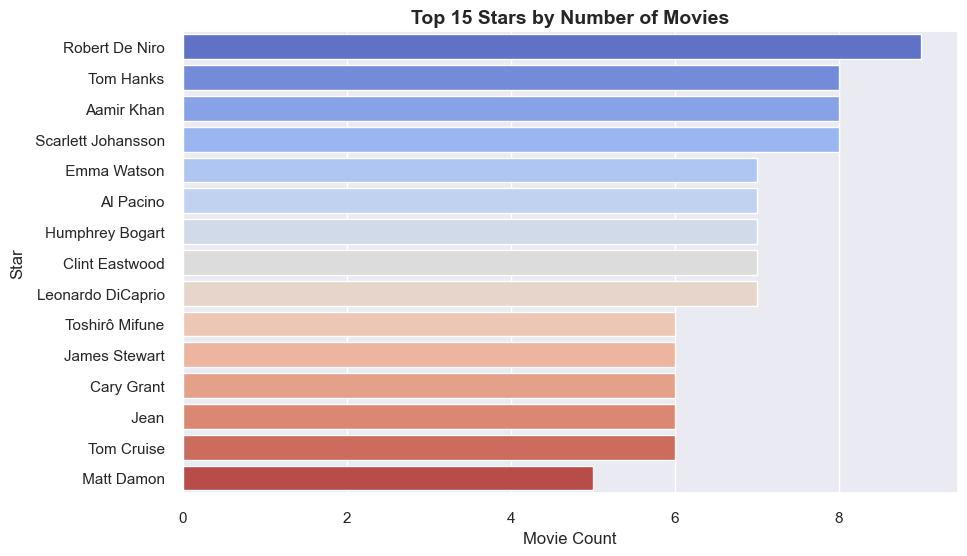

In [71]:
stars_pd = df_stars.groupBy("Star").count().orderBy(col("count").desc()).limit(15).toPandas()
plt.figure(figsize=(10,6))
sns.barplot(data=stars_pd, y="Star", x="count", palette="coolwarm")
plt.title("Top 15 Stars by Number of Movies", fontsize=14, fontweight="bold")
plt.xlabel("Movie Count")
plt.ylabel("Star")
plt.show()


##### It creates a **bar chart** of the **top 15 most frequent stars (actors/actresses)**, showing how many movies each has appeared in.


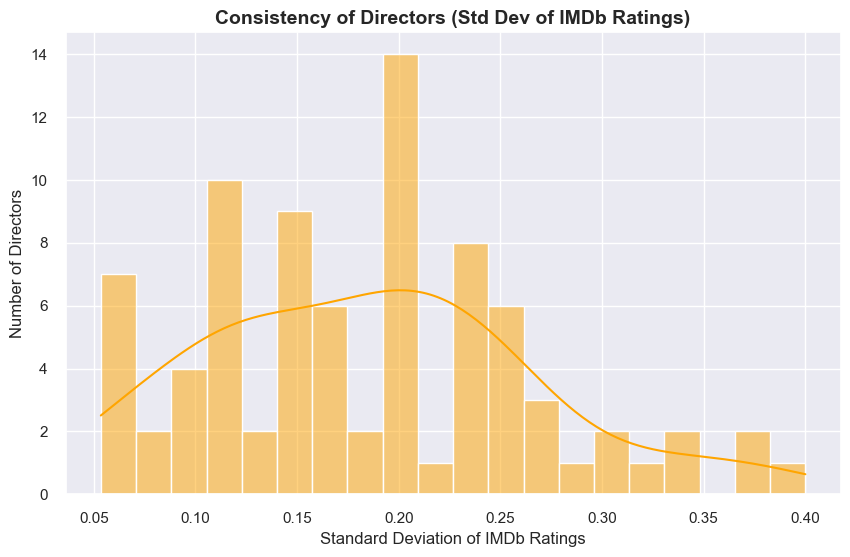

In [74]:
from pyspark.sql.functions import stddev, count, col
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate: standard deviation of IMDb Rating and count of titles per director
dir_std_pd = df2.groupBy("Director").agg(
    stddev("IMDb Rating").alias("Rating_StdDev"),
    count("Title").alias("Title_Count")
).filter(col("Title_Count") >= 3).toPandas()

# Plotting
plt.figure(figsize=(10,6))
sns.histplot(dir_std_pd["Rating_StdDev"], bins=20, color="orange", kde=True)
plt.title("Consistency of Directors (Std Dev of IMDb Ratings)", fontsize=14, fontweight="bold")
plt.xlabel("Standard Deviation of IMDb Ratings")
plt.ylabel("Number of Directors")
plt.show()

##### It creates a **histogram** of the standard deviation of IMDb Ratings for directors with at least 3 movies, showing how consistent or varied their ratings are.


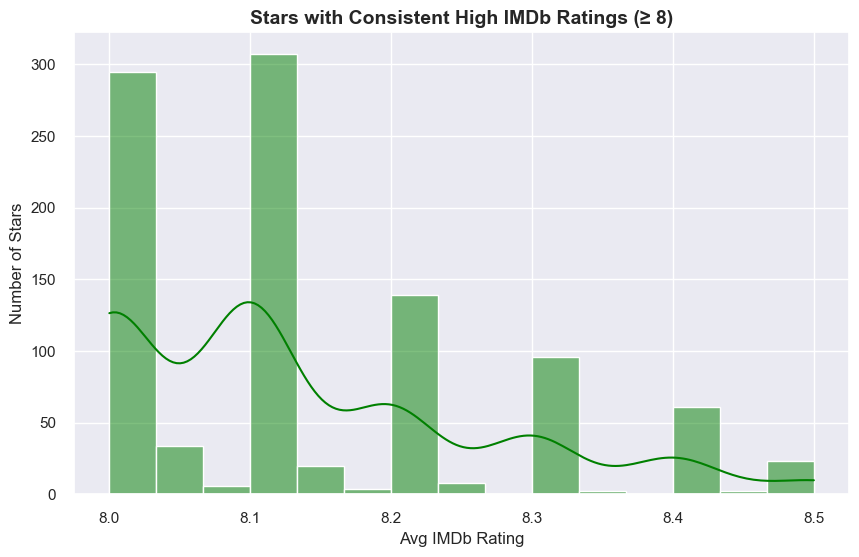

In [81]:
stars_consist_pd = df_stars.groupBy("Star").avg("IMDb Rating").filter(col("avg(IMDb Rating)")>=8).toPandas()
plt.figure(figsize=(10,6))
sns.histplot(stars_consist_pd["avg(IMDb Rating)"], bins=15, color="green", kde=True)
plt.title("Stars with Consistent High IMDb Ratings (≥ 8)", fontsize=14, fontweight="bold")
plt.xlabel("Avg IMDb Rating")
plt.ylabel("Number of Stars")
plt.show()


#### Filters the dataset based on the specified condition so that only matching rows are shown in the output.

C:\Users\abc\AppData\Local\Temp\ipykernel_31060\1787530373.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rounded_pd, x="RoundedRating", y="count", palette="Spectral")


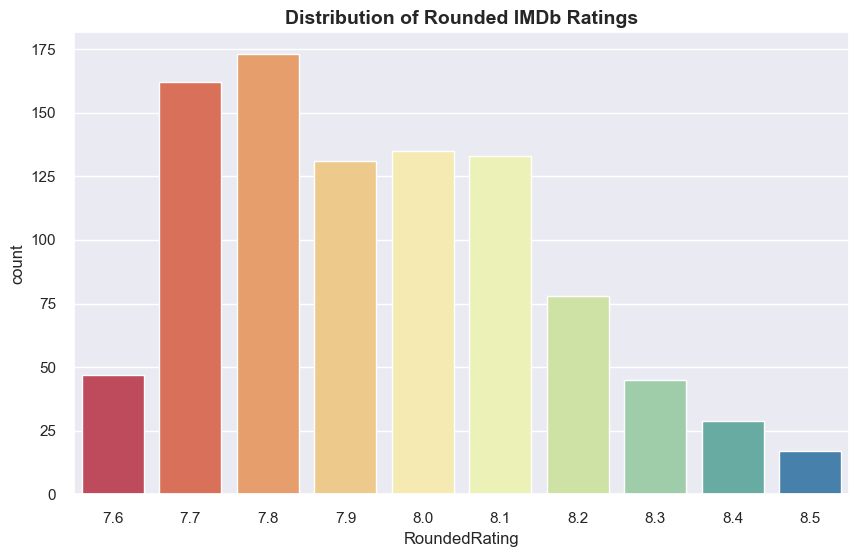

In [87]:
from pyspark.sql.functions import round

rounded_df = df2.withColumn("RoundedRating", round("IMDb Rating",1))
rounded_pd = rounded_df.groupBy("RoundedRating").count().orderBy("RoundedRating").toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data=rounded_pd, x="RoundedRating", y="count", palette="Spectral")
plt.title("Distribution of Rounded IMDb Ratings", fontsize=14, fontweight="bold")
plt.show()


##### Groups the dataset by the chosen column and counts the number of records per group, giving frequency information.

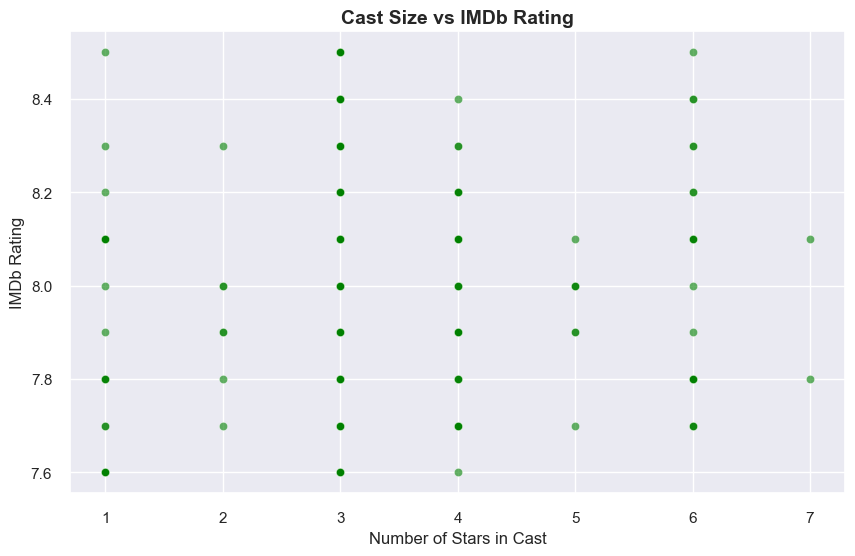

In [88]:
cast_size_pd = df_stars.groupBy("Title").count().join(df2,"Title").select("count","IMDb Rating").toPandas()

plt.figure(figsize=(10,6))
sns.scatterplot(data=cast_size_pd, x="count", y="IMDb Rating", alpha=0.6, color="green")
plt.title("Cast Size vs IMDb Rating", fontsize=14, fontweight="bold")
plt.xlabel("Number of Stars in Cast")
plt.show()


### Selects the specified columns from the DataFrame to focus only on relevant attributes for analysis.

C:\Users\abc\AppData\Local\Temp\ipykernel_31060\2586496849.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words, x="Count", y="Word", palette="tab10")


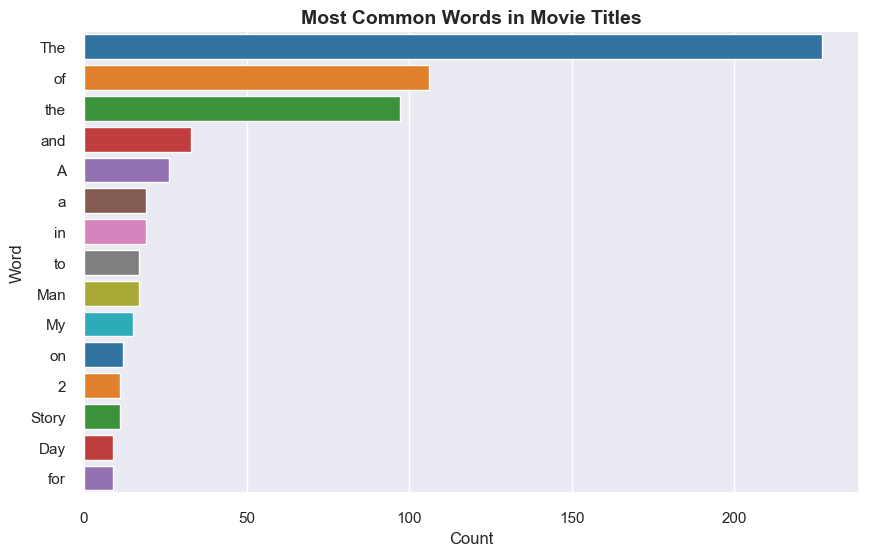

In [90]:
from collections import Counter

words = " ".join(df2.select("Title").toPandas()["Title"].tolist()).replace("(","").replace(")","").split()
word_counts = Counter(words)
common_words = pd.DataFrame(word_counts.most_common(15), columns=["Word","Count"])

plt.figure(figsize=(10,6))
sns.barplot(data=common_words, x="Count", y="Word", palette="tab10")
plt.title("Most Common Words in Movie Titles", fontsize=14, fontweight="bold")
plt.show()


### It creates a **bar chart** of the 15 most common words found in movie titles, showing their frequencies.


C:\Users\abc\AppData\Local\Temp\ipykernel_31060\1115577408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=the_pd, x="HasThe", y="avg(IMDb Rating)", palette="coolwarm")


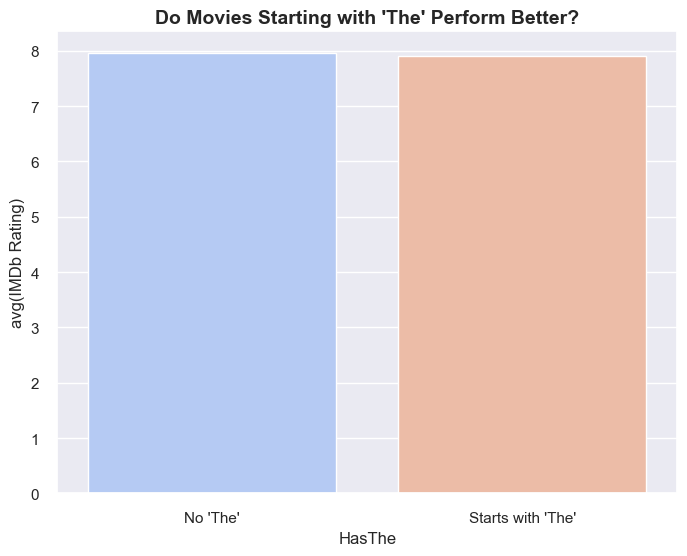

In [93]:
df_the = df2.withColumn("HasThe", col("Title").like("The%"))
the_pd = df_the.groupBy("HasThe").avg("IMDb Rating").toPandas()

plt.figure(figsize=(8,6))
sns.barplot(data=the_pd, x="HasThe", y="avg(IMDb Rating)", palette="coolwarm")
plt.title("Do Movies Starting with 'The' Perform Better?", fontsize=14, fontweight="bold")
plt.xticks([0,1],["No 'The'","Starts with 'The'"])
plt.show()


### It compares movies that **start with “The”** against those that don’t, plotting their **average IMDb Rating** to see if the prefix affects performance.


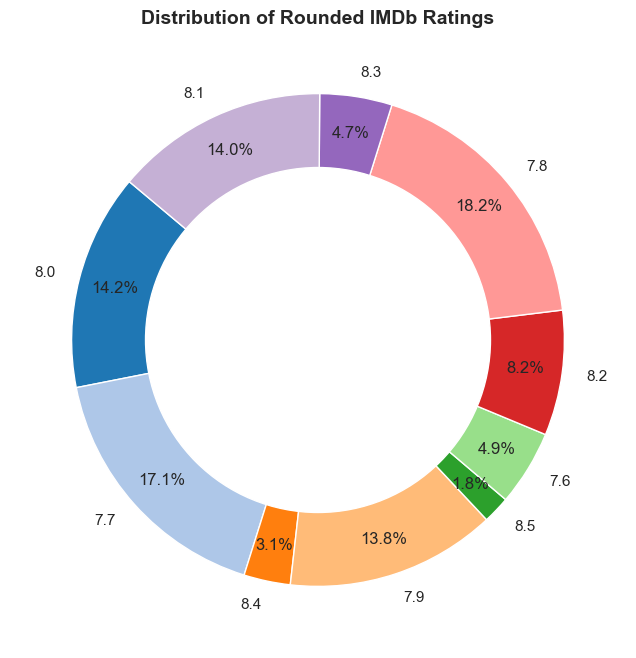

In [96]:
rounded_pd = rounded_df.groupBy("RoundedRating").count().toPandas()

plt.figure(figsize=(8,8))
plt.pie(rounded_pd["count"], labels=rounded_pd["RoundedRating"], autopct="%1.1f%%",
        startangle=140, pctdistance=0.85, colors=sns.color_palette("tab20"))
centre_circle = plt.Circle((0,0),0.70,fc="white")
plt.gca().add_artist(centre_circle)
plt.title("Distribution of Rounded IMDb Ratings", fontsize=14, fontweight="bold")
plt.show()


### It creates a **donut chart** showing the percentage distribution of movies by their **rounded IMDb Ratings**.


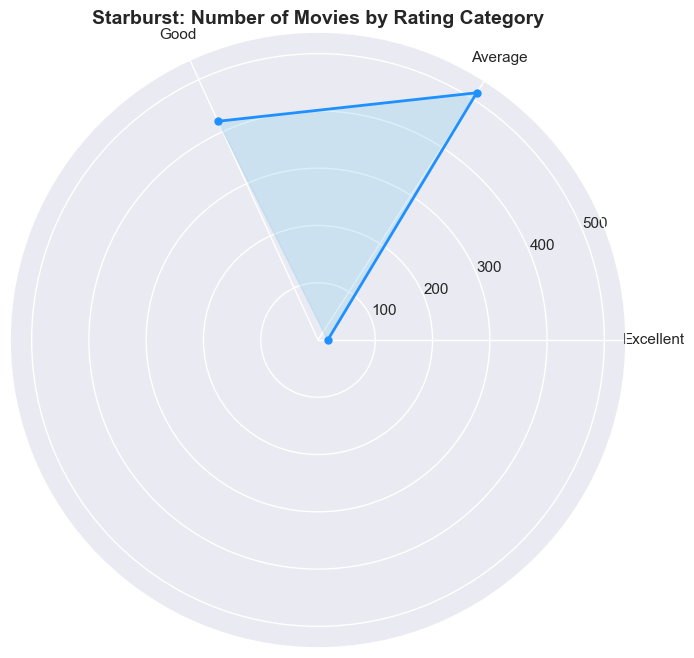

In [98]:
cat_pd = df2_cat.groupBy("RatingCategory").count().toPandas()

plt.figure(figsize=(8,8))
angles = range(len(cat_pd))
plt.polar(angles, cat_pd["count"], marker="o", linewidth=2, color="dodgerblue")
plt.fill(angles, cat_pd["count"], alpha=0.3, color="skyblue")
plt.xticks(angles, cat_pd["RatingCategory"])
plt.title("Starburst: Number of Movies by Rating Category", fontsize=14, fontweight="bold")
plt.show()


### It creates a **polar (starburst) chart** showing how many movies fall into each **rating category**.


In [ ]:
spark.stop()

### That command **stops the Spark session**, releasing all resources used by Spark. ✅



## 📊 Summary of Analytics
In this notebook, we performed the following main steps:

1. **Data Loading & Inspection**
   - Loaded IMDb top-rated movies dataset into PySpark DataFrame.
   - Inspected schema, rows, and data quality.

2. **Data Cleaning & Transformation**
   - Handled missing values in columns (e.g., Meta Score, Gross earnings).
   - Converted data types where necessary.
   - Extracted and engineered new features (genres, year, etc.).

3. **Exploratory Data Analysis**
   - Checked distribution of IMDb ratings, votes, and metascores.
   - Analyzed most common genres, directors, and stars.
   - Compared IMDb rating vs. metascore vs. worldwide gross.

4. **Aggregations & Insights**
   - Found top movies by rating, votes, and gross.
   - Analyzed trends over time (movie release years).
   - Explored relationship between critics' metascore and audience IMDb rating.

---

## 📝 Description of Summary
This analysis helped us understand trends in IMDb’s top-rated movies. We observed:
- Highly rated movies span across multiple genres but drama dominates.
- IMDb user ratings and critic metascores don’t always align.
- Box office gross is not always proportional to IMDb rating.
- Certain directors and stars frequently appear in top-rated movies.

These insights demonstrate how **audience ratings, critical reviews, and financial success** may diverge, providing a multi-faceted view of movie success.
